# Camera Calibration

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

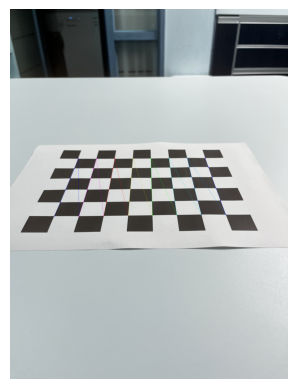

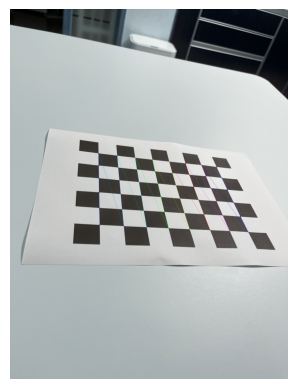

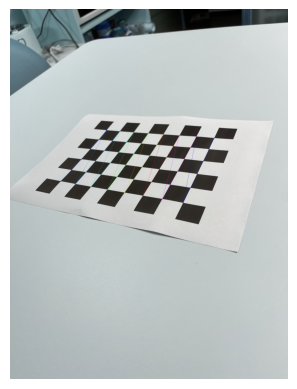

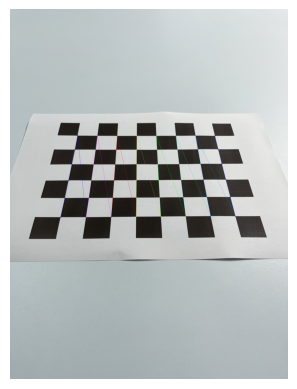

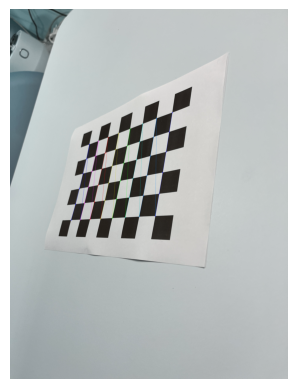

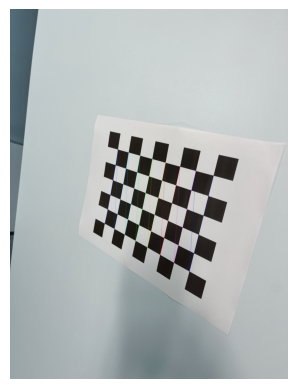

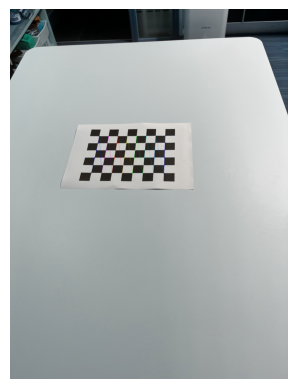

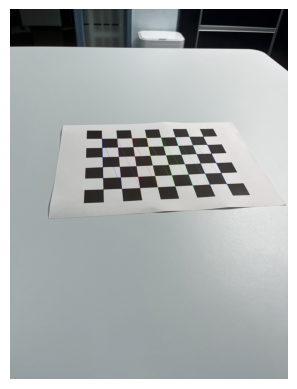

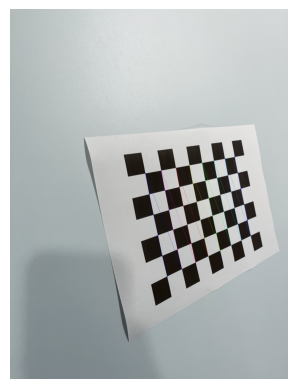

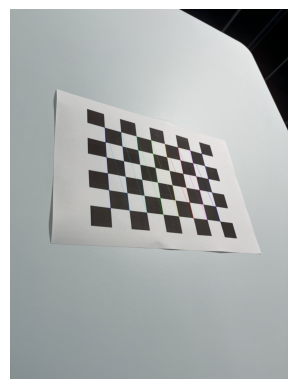

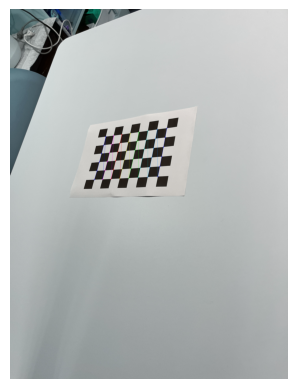

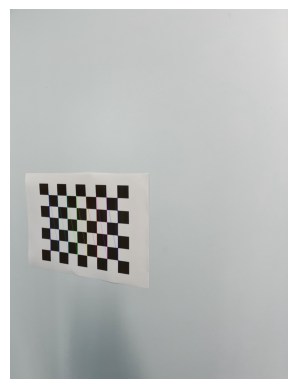

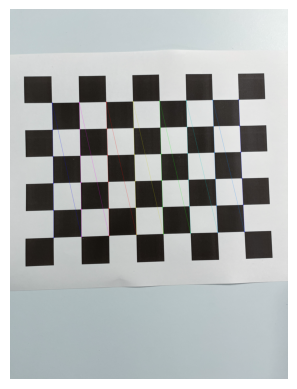

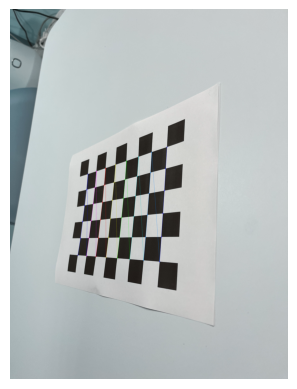

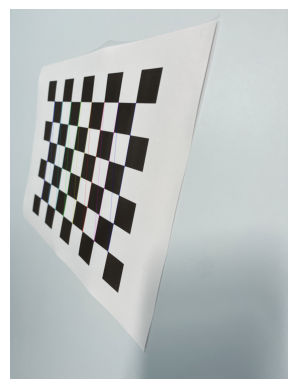

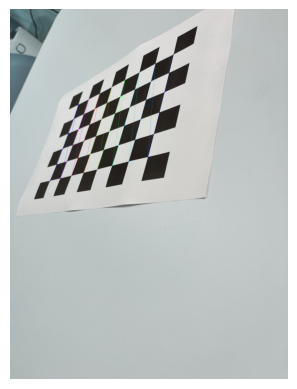

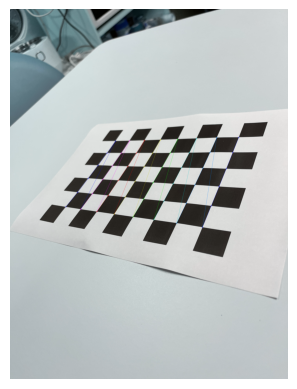

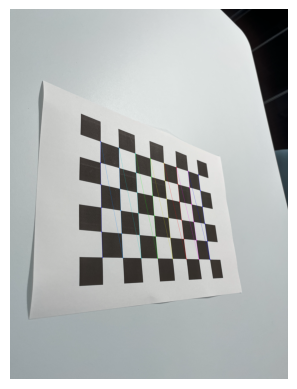

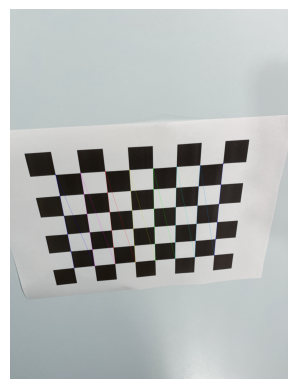

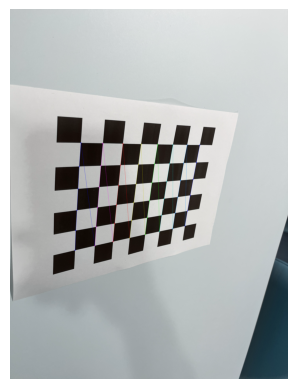

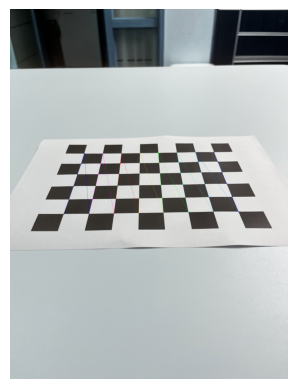

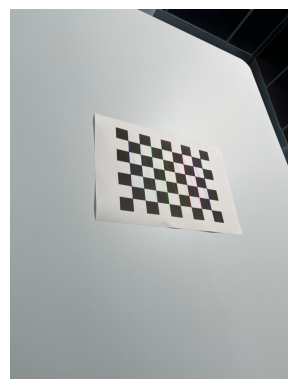

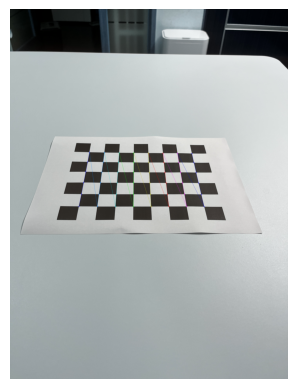

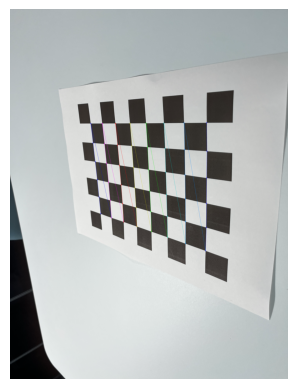

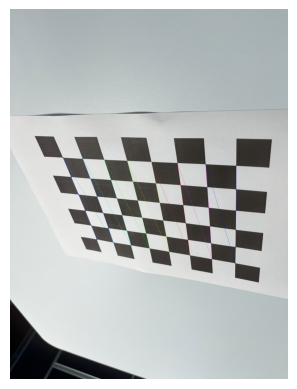

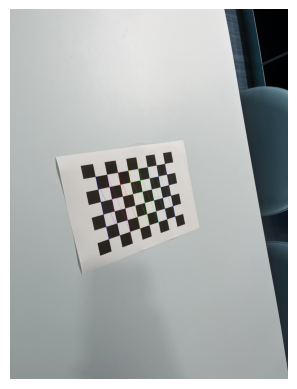

In [9]:
import glob

nH = 8
nV = 6
nSize = 24

images = glob.glob('./captures/*.JPG')

CHECKERBOARD = (nV,nH)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objpoints = []
imgpoints = []

objp = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2) * nSize
prev_img_shape = None

for fname in images:
    img = cv2.imread(fname)
    # img = cv2.resize(img, dsize=(0,0), fx=0.25, fy=0.25, interpolation=cv2.INTER_LINEAR)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray,
                                             CHECKERBOARD,
                                             cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK + cv2.CALIB_CB_NORMALIZE_IMAGE)

    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)
        imgpoints.append(corners2)
        img = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

h,w = img.shape[:2]
ret, intrinsic, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)




In [18]:
print(h,w)

2016 1512


## Check your camera intrinsic parameters
* Intrinsic matrix (3x3)
* Distortion coefficient (1x5)


In [33]:
print("Intrinsic matrix : \n")
print(intrinsic)

print("dist : \n")
print(dist)

print(type(intrinsic))
print(type(dist))
print(intrinsic.dtype)
print(dist.dtype)



Intrinsic matrix : 

[[780.37259708   0.         366.88905536]
 [  0.         774.904649   502.09716743]
 [  0.           0.           1.        ]]
dist : 

[[ 0.22798308 -1.34765727 -0.00387359 -0.00596731  2.98130718]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
float64
float64


### 0.5 size
Intrinsic:

[[1.55926684e+03 0.00000000e+00 7.34648878e+02]
 [0.00000000e+00 1.54829020e+03 1.00482600e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
 
 dist:
 [[ 0.22385593 -1.30535971 -0.00386339 -0.00591073  2.86203074]]

 ### 1.0 size
 
 Intrinsic matrix : 

[[3.11673899e+03 0.00000000e+00 1.46846666e+03]
 [0.00000000e+00 3.09463761e+03 2.00977621e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
 
dist : 
[[ 0.21993938 -1.25276135 -0.00397022 -0.00614107  2.70973121]]


### 0.25 size

Intrinsic matrix : 

[[780.37259708   0.         366.88905536]
 [  0.         774.904649   502.09716743]
 [  0.           0.           1.        ]]

dist : 
[[ 0.22798308 -1.34765727 -0.00387359 -0.00596731  2.98130718]]